<a href="https://colab.research.google.com/github/pralaksh/INSE6220/blob/main/Finalnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret==2.3.6

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/pralaksh/INSE6220/main/Vehicles_dataset_1.csv')
df.head(25)

mpg  cylinders  displacement  weight  acceleration  class
0    18          8         307.0    3504          12.0     70
1    15          8         350.0    3693          11.5     70
2    18          8         318.0    3436          11.0     70
3    16          8         304.0    3433          12.0     70
4    17          8         302.0    3449          10.5     70
5    15          8         429.0    4341          10.0     70
6    14          8         454.0    4354           9.0     70
7    14          8         440.0    4312           8.5     70
8    14          8         455.0    4425          10.0     70
9    15          8         390.0    3850           8.5     70
10   15          8         383.0    3563          10.0     70
11   14          8         340.0    3609           8.0     70
12   15          8         400.0    3761           9.5     70
13   14          8         455.0    3086          10.0     70
14   24          4         113.0    2372          15.0     70
15   22          6         198.0    2833          15.5     70
16   18          6         199.0    2774          15.5     70
17   21          6         200.0    2587          16.0     70
18   27          4          97.0    2130          14.5     70
19   26          4          97.0    1835          20.5     70
20   25          4         110.0    2672          17.5     70
21   24          4         107.0    2430          14.5     70
22   25          4         104.0    2375          17.5     70
23   26          4         121.0    2234          12.5     70
24   21          6         199.0    2648          15.0     70

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           89 non-null     int64  
 1   cylinders     89 non-null     int64  
 2   displacement  89 non-null     float64
 3   weight        89 non-null     int64  
 4   acceleration  89 non-null     float64
 5   class         89 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 4.3 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


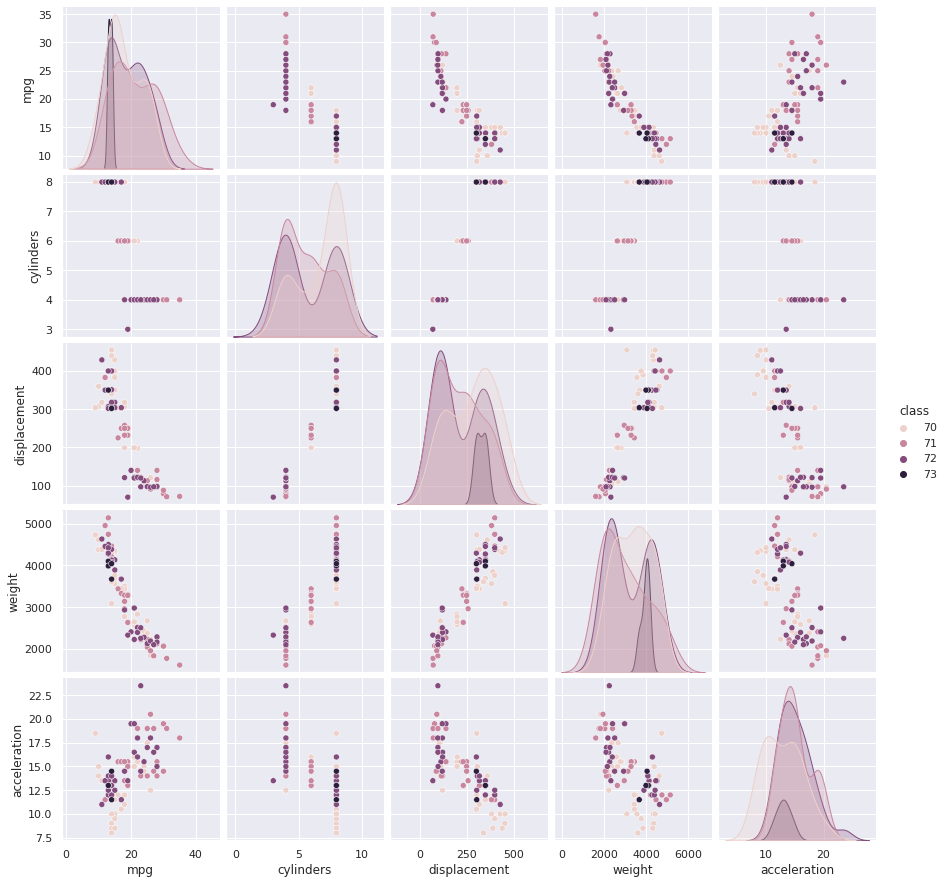

In [10]:
sns.pairplot(df, hue='class')
plt.show()

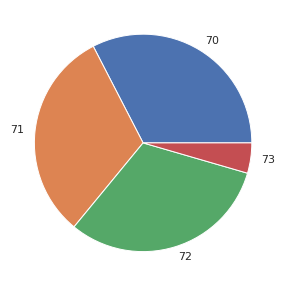

In [11]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [12]:
X = df.drop(columns=['class'])
X.head(10)

mpg  cylinders  displacement  weight  acceleration
0   18          8         307.0    3504          12.0
1   15          8         350.0    3693          11.5
2   18          8         318.0    3436          11.0
3   16          8         304.0    3433          12.0
4   17          8         302.0    3449          10.5
5   15          8         429.0    4341          10.0
6   14          8         454.0    4354           9.0
7   14          8         440.0    4312           8.5
8   14          8         455.0    4425          10.0
9   15          8         390.0    3850           8.5

In [13]:
X.describe().transpose()

count         mean         std     min     25%     50%     75%  \
mpg            89.0    18.943820    5.920610     9.0    14.0    18.0    24.0   
cylinders      89.0     6.146067    1.880223     3.0     4.0     6.0     8.0   
displacement   89.0   241.061798  122.722752    70.0   113.0   250.0   350.0   
weight         89.0  3237.539326  958.012135  1613.0  2288.0  3288.0  4129.0   
acceleration   89.0    14.325843    3.061956     8.0    12.0    14.0    16.0   

                 max  
mpg             35.0  
cylinders        8.0  
displacement   455.0  
weight        5140.0  
acceleration    23.5

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

mpg  cylinders  displacement    weight  acceleration
0 -0.160316   0.991604      0.540338  0.279715     -0.763897
1 -0.669891   0.991604      0.892707  0.478116     -0.928117
2 -0.160316   0.991604      0.630479  0.208333     -1.092336
3 -0.500033   0.991604      0.515754  0.205183     -0.763897
4 -0.330174   0.991604      0.499365  0.221979     -1.256556
5 -0.669891   0.991604      1.540081  1.158349     -1.420775
6 -0.839750   0.991604      1.744947  1.171996     -1.749214
7 -0.839750   0.991604      1.630222  1.127907     -1.913434
8 -0.839750   0.991604      1.753141  1.246528     -1.420775
9 -0.669891   0.991604      1.220491  0.642926     -1.913434

In [15]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
mpg            89.0  4.989766e-17  1.005666 -1.689042 -0.839750 -0.160316   
cylinders      89.0  1.022902e-16  1.005666 -1.682721 -1.147856 -0.078126   
displacement   89.0 -4.178929e-17  1.005666 -1.401786 -1.049417  0.073245   
weight         89.0  2.120651e-17  1.005666 -1.705347 -0.996772  0.052971   
acceleration   89.0  1.641165e-16  1.005666 -2.077653 -0.763897 -0.107019   

                   75%       max  
mpg           0.858835  2.727278  
cylinders     0.991604  0.991604  
displacement  0.892707  1.753141  
weight        0.935804  1.997093  
acceleration  0.549859  3.013151

In [16]:
observations = list(df.index)
variables = list(df.columns)

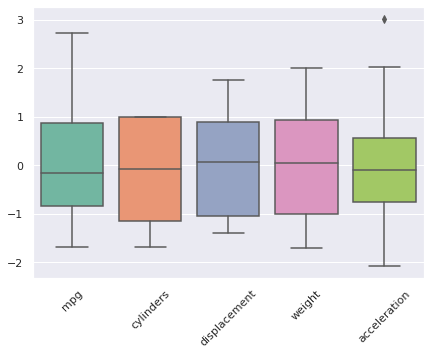

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

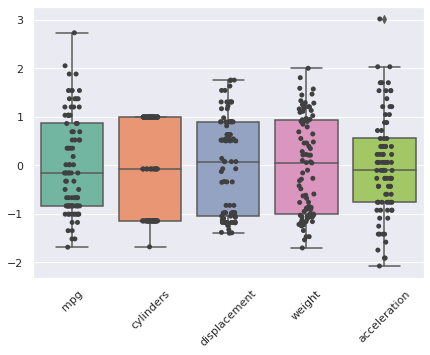

In [18]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

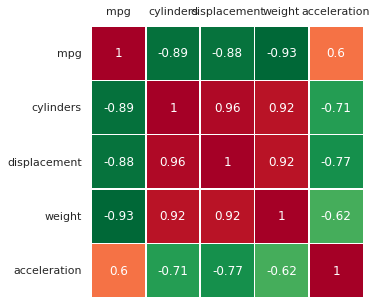

In [26]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

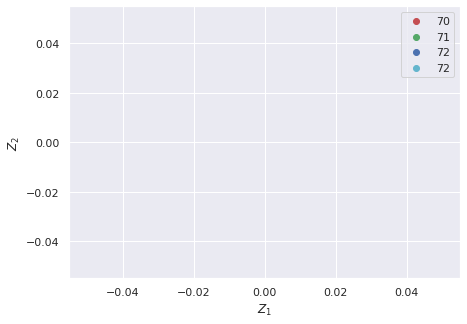

In [27]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(70)->0,  2(71)->1, 3(72)->2, 4(73)->3
idx_1 = np.where(y == 0)
idx_2 = np.where(y == 1)
idx_3 = np.where(y == 2)
idx_4 = np.where(y == 3)

plt.figure()
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='70')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='71')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label='72')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='c', label='72')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

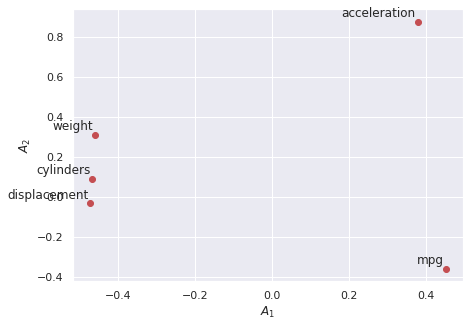

In [28]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


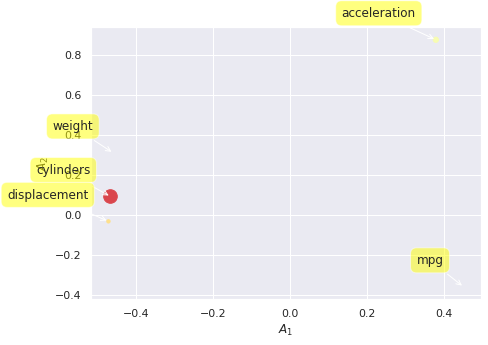

In [29]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

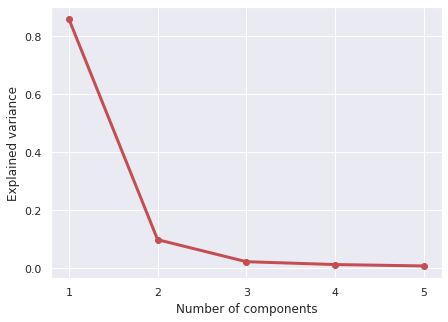

In [30]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

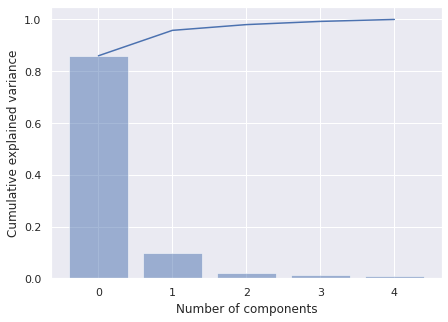

In [31]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [40]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='70')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='71')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label='72')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='c', label='73')
plt.legend(loc='upper left')

TypeError: ignored

In [32]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=83731a28e7a7723d485e29f7b69fca8e466b597e58d16bec3d5fb1c53977657c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [33]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [34]:
out['PC']

PC1       PC2
0  -1.208963 -0.452621
1  -1.758581 -0.362779
2  -1.343023 -0.764934
3  -1.316080 -0.351918
4  -1.426018 -0.838452
..       ...       ...
84  2.530958 -0.302121
85 -1.921846  0.322668
86 -1.646791 -0.295317
87 -1.867719  0.286412
88 -1.444902  0.686708

[89 rows x 2 columns]

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f812ab86c50>)

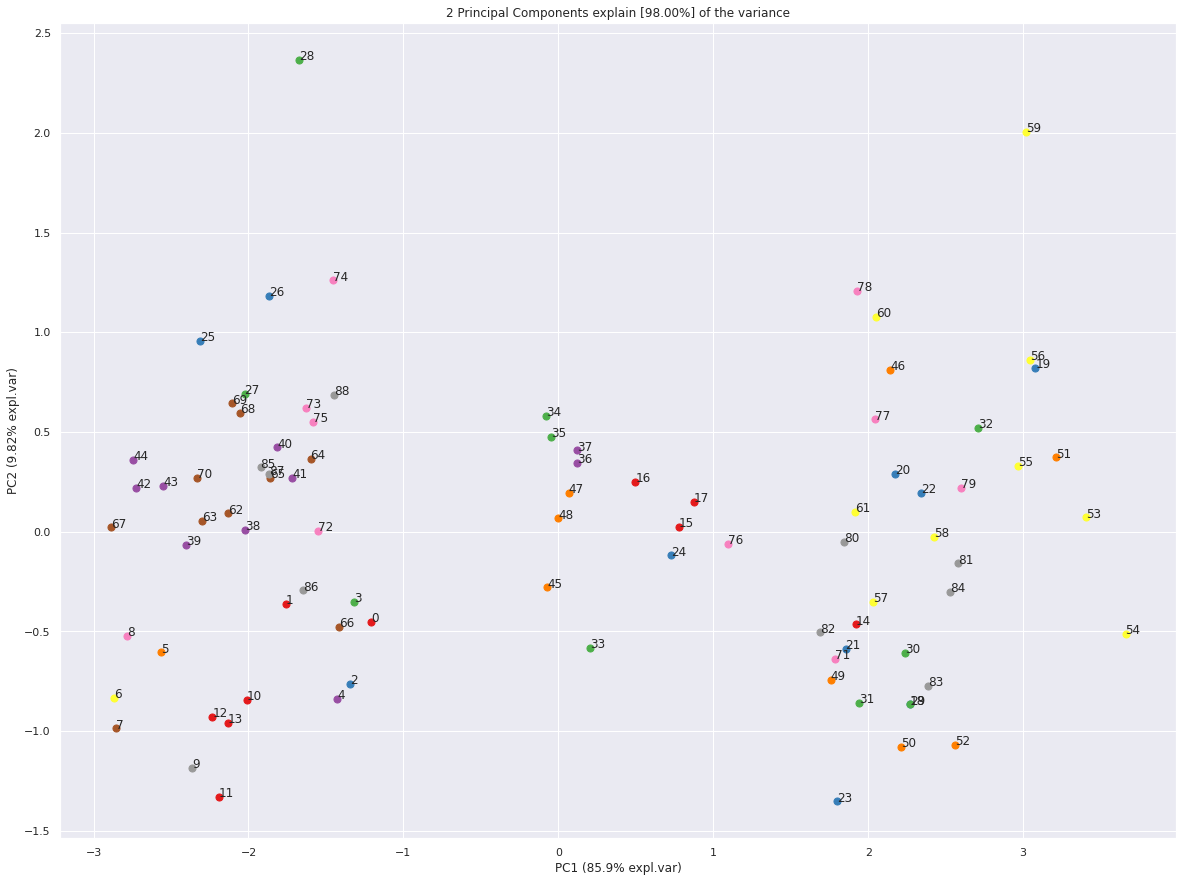

In [35]:
model.scatter(label=True, legend=False)

In [36]:
A = out['loadings'].T

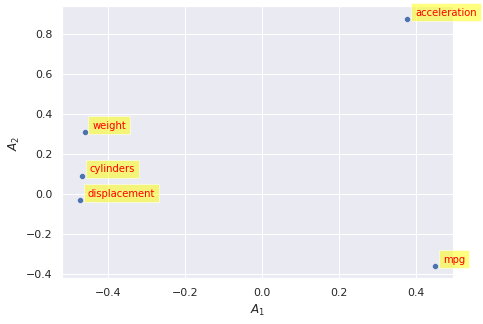

In [37]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

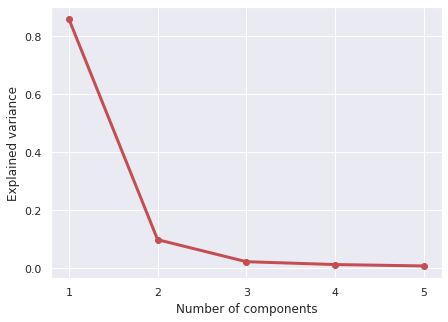

In [38]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

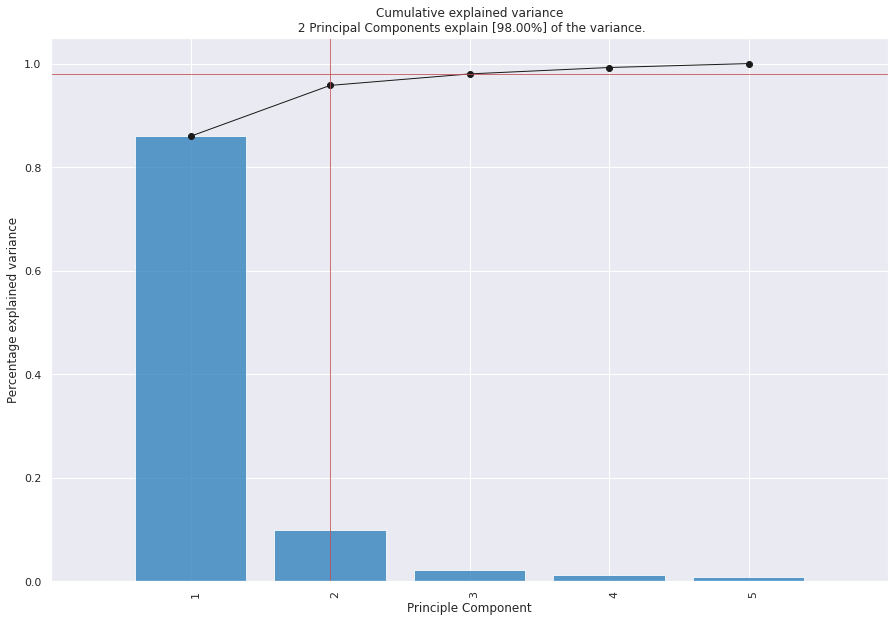

<Figure size 504x360 with 0 Axes>

In [41]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


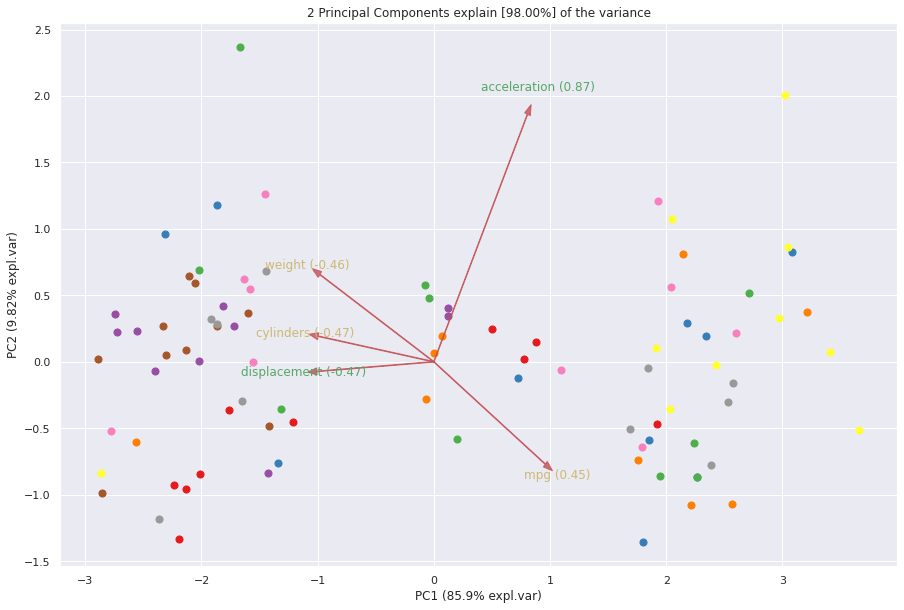

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8125b7ce50>)

In [42]:
model.biplot(label=False, legend=False)

In [44]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [45]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (80, 6)
Unseen Data For Predictions: (9, 6)


In [46]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data           (80, 6)
5                           Missing Values             False
6                         Numeric Features                 3
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (55, 27)
12                    Transformed Test Set          (25, 27)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              d596
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [47]:
best_model = compare_models()

Model  Accuracy  AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.5667  0.0  0.5458  0.5500   
gbc          Gradient Boosting Classifier    0.5133  0.0  0.5000  0.4722   
et                 Extra Trees Classifier    0.5033  0.0  0.5042  0.4189   
rf               Random Forest Classifier    0.4700  0.0  0.4625  0.3961   
nb                            Naive Bayes    0.4533  0.0  0.4458  0.3217   
ada                  Ada Boost Classifier    0.4533  0.0  0.4292  0.4167   
lightgbm  Light Gradient Boosting Machine    0.4467  0.0  0.4208  0.4139   
knn                K Neighbors Classifier    0.3900  0.0  0.3833  0.3361   
ridge                    Ridge Classifier    0.3667  0.0  0.3667  0.3067   
lr                    Logistic Regression    0.3633  0.0  0.3625  0.2822   
dummy                    Dummy Classifier    0.3500  0.0  0.3250  0.1272   
lda          Linear Discriminant Analysis    0.3467  0.0  0.3417  0.2789   
svm                   SVM - Linear Kernel    0.2933  0.0  0.2750  0.1098   

              F1   Kappa     MCC  TT (Sec)  
dt        0.5307  0.3407  0.3718     0.021  
gbc       0.4718  0.2752  0.3052     0.241  
et        0.4396  0.2700  0.2914     0.458  
rf        0.4131  0.2214  0.2396     0.483  
nb        0.3647  0.1642  0.1981     0.028  
ada       0.4044  0.2025  0.2307     0.091  
lightgbm  0.4018  0.1710  0.1942     0.069  
knn       0.3344  0.0912  0.1111     0.136  
ridge     0.3142  0.0717  0.0775     0.025  
lr        0.2960  0.0484  0.0474     0.933  
dummy     0.1857  0.0000  0.0000     0.011  
lda       0.2955  0.0420  0.0415     0.015  
svm       0.1579 -0.0333 -0.0361     0.084

In [48]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [49]:
dt = create_model('dt')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.0  0.5000  0.3889  0.4333  0.2500  0.2611
1       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
2       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
3       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
4       0.1667  0.0  0.1250  0.1111  0.1333 -0.2500 -0.2774
5       0.6000  0.0  0.5000  0.6667  0.5867  0.3750  0.4009
6       0.4000  0.0  0.3333  0.4000  0.4000  0.1176  0.1250
7       0.6000  0.0  0.5000  0.4667  0.5200  0.3333  0.3608
8       0.6000  0.0  0.6667  0.4000  0.4667  0.3750  0.5303
9       0.8000  0.0  0.8333  0.9000  0.8000  0.7059  0.7500
Mean    0.5667  0.0  0.5458  0.5500  0.5307  0.3407  0.3718
SD      0.1673  0.0  0.1923  0.2226  0.1764  0.2488  0.2705

In [50]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [51]:
tuned_dt = tune_model(dt)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.0  0.6667  0.6667  0.6667  0.5000  0.5000
1       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
2       0.5000  0.0  0.5000  0.3333  0.4000  0.2500  0.2887
3       0.8333  0.0  0.8333  0.8889  0.8222  0.7500  0.7833
4       0.5000  0.0  0.3750  0.5000  0.4444  0.2800  0.3236
5       0.2000  0.0  0.3333  0.0500  0.0800 -0.0526 -0.0884
6       0.4000  0.0  0.5000  0.4667  0.3667  0.1667  0.2004
7       0.8000  0.0  0.6667  0.6667  0.7200  0.6667  0.7217
8       0.2000  0.0  0.1667  0.1333  0.1600 -0.2500 -0.2673
9       0.8000  0.0  0.8333  0.9000  0.8000  0.7059  0.7500
Mean    0.5567  0.0  0.5542  0.5328  0.5116  0.3517  0.3734
SD      0.2246  0.0  0.2075  0.2777  0.2481  0.3166  0.3365

In [52]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [54]:
!pip install statsmodels --upgrade

In [55]:
knn = create_model('knn')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3333  0.0  0.3333  0.1667  0.2222  0.0000  0.0000
1       0.5000  0.0  0.5000  0.5000  0.4444  0.2500  0.2887
2       0.3333  0.0  0.3333  0.2500  0.2778 -0.0000  0.0000
3       0.3333  0.0  0.3333  0.2778  0.3000  0.0000  0.0000
4       0.0000  0.0  0.0000  0.0000  0.0000 -0.4400 -0.4599
5       0.2000  0.0  0.1667  0.4000  0.2667 -0.1111 -0.1336
6       0.6000  0.0  0.6667  0.4667  0.5000  0.4444  0.5774
7       0.4000  0.0  0.3333  0.2000  0.2667  0.0000  0.0000
8       0.4000  0.0  0.3333  0.2000  0.2667  0.0625  0.0884
9       0.8000  0.0  0.8333  0.9000  0.8000  0.7059  0.7500
Mean    0.3900  0.0  0.3833  0.3361  0.3344  0.0912  0.1111
SD      0.2055  0.0  0.2242  0.2357  0.1997  0.2975  0.3306

In [56]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3333  0.0  0.3333  0.1333  0.1905  0.0000  0.0000
1       0.3333  0.0  0.3333  0.2222  0.2667  0.0000  0.0000
2       0.3333  0.0  0.3333  0.1111  0.1667  0.0000  0.0000
3       0.5000  0.0  0.5000  0.3333  0.3889  0.2500  0.3062
4       0.3333  0.0  0.3750  0.1667  0.2167  0.1111  0.1387
5       0.8000  0.0  0.6667  0.6667  0.7200  0.6667  0.7217
6       0.2000  0.0  0.1667  0.1333  0.1600 -0.3333 -0.3608
7       0.6000  0.0  0.6667  0.4000  0.4667  0.3750  0.5303
8       0.6000  0.0  0.6667  0.3667  0.4533  0.4118  0.5052
9       0.4000  0.0  0.5000  0.2333  0.2933  0.1176  0.1443
Mean    0.4433  0.0  0.4542  0.2767  0.3323  0.1599  0.1986
SD      0.1700  0.0  0.1650  0.1625  0.1681  0.2643  0.3045

In [57]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [58]:
lr = create_model('lr')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.0  0.5000  0.4444  0.4667  0.2500  0.2611
1       0.3333  0.0  0.3333  0.4167  0.3333  0.0000  0.0000
2       0.3333  0.0  0.3333  0.1111  0.1667  0.0000  0.0000
3       0.5000  0.0  0.5000  0.5000  0.4444  0.2500  0.2887
4       0.1667  0.0  0.1250  0.0667  0.0952 -0.2500 -0.3721
5       0.2000  0.0  0.3333  0.0500  0.0800 -0.0526 -0.0884
6       0.2000  0.0  0.1667  0.2000  0.2000 -0.2500 -0.2500
7       0.4000  0.0  0.3333  0.2667  0.3200  0.0625  0.0668
8       0.6000  0.0  0.6667  0.3667  0.4533  0.4118  0.5052
9       0.4000  0.0  0.3333  0.4000  0.4000  0.0625  0.0625
Mean    0.3633  0.0  0.3625  0.2822  0.2960  0.0484  0.0474
SD      0.1378  0.0  0.1514  0.1580  0.1420  0.2017  0.2452

In [59]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
1       0.1667  0.0  0.1667  0.1667  0.1667 -0.2500 -0.2611
2       0.3333  0.0  0.3333  0.1111  0.1667  0.0000  0.0000
3       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
4       0.3333  0.0  0.2500  0.1111  0.1667  0.0000  0.0000
5       0.2000  0.0  0.3333  0.0500  0.0800 -0.0526 -0.0884
6       0.4000  0.0  0.5000  0.3000  0.3333  0.1176  0.1250
7       0.8000  0.0  0.8333  0.8667  0.7867  0.6875  0.7350
8       0.4000  0.0  0.3333  0.2000  0.2667  0.0625  0.0884
9       0.6000  0.0  0.6667  0.7000  0.6000  0.4118  0.4375
Mean    0.4567  0.0  0.4750  0.3950  0.3878  0.1977  0.2081
SD      0.2033  0.0  0.2110  0.3015  0.2463  0.2889  0.3072

In [60]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [61]:
rf = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.0  0.5000  0.3889  0.4333  0.2500  0.2611
1       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
2       0.6667  0.0  0.6667  0.4444  0.5333  0.5000  0.5774
3       0.5000  0.0  0.5000  0.6111  0.5222  0.2500  0.2611
4       0.1667  0.0  0.1250  0.1111  0.1333 -0.2000 -0.2091
5       0.2000  0.0  0.3333  0.0500  0.0800 -0.0526 -0.0884
6       0.4000  0.0  0.3333  0.4000  0.4000  0.1176  0.1250
7       0.6000  0.0  0.5000  0.6000  0.6000  0.3750  0.3750
8       0.6000  0.0  0.6667  0.3667  0.4533  0.4118  0.5052
9       0.4000  0.0  0.3333  0.2667  0.3200  0.0625  0.0668
Mean    0.4700  0.0  0.4625  0.3961  0.4131  0.2214  0.2396
SD      0.1696  0.0  0.1712  0.2038  0.1789  0.2248  0.2521

In [62]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.0  0.6667  0.5000  0.5556  0.5000  0.6124
1       0.5000  0.0  0.5000  0.4667  0.4127  0.2500  0.3873
2       0.5000  0.0  0.5000  0.4667  0.4127  0.2500  0.3873
3       0.5000  0.0  0.5000  0.4667  0.4127  0.2500  0.3873
4       0.3333  0.0  0.2500  0.1111  0.1667  0.0000  0.0000
5       0.2000  0.0  0.3333  0.0400  0.0667  0.0000  0.0000
6       0.4000  0.0  0.5000  0.4500  0.3467  0.2105  0.3536
7       0.6000  0.0  0.6667  0.4667  0.5000  0.4444  0.5774
8       0.2000  0.0  0.3333  0.0400  0.0667  0.0000  0.0000
9       0.4000  0.0  0.5000  0.4500  0.3467  0.2105  0.3536
Mean    0.4300  0.0  0.4750  0.3458  0.3287  0.2115  0.3059
SD      0.1472  0.0  0.1294  0.1860  0.1632  0.1662  0.2174

In [63]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [64]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.0  0.6667  0.6667  0.6667  0.5000  0.5000
1       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
2       0.5000  0.0  0.5000  0.3333  0.4000  0.2500  0.2887
3       0.8333  0.0  0.8333  0.8889  0.8222  0.7500  0.7833
4       0.5000  0.0  0.3750  0.5000  0.4444  0.2800  0.3236
5       0.2000  0.0  0.3333  0.0500  0.0800 -0.0526 -0.0884
6       0.4000  0.0  0.5000  0.4667  0.3667  0.1667  0.2004
7       0.8000  0.0  0.6667  0.6667  0.7200  0.6667  0.7217
8       0.2000  0.0  0.1667  0.1333  0.1600 -0.2500 -0.2673
9       0.8000  0.0  0.8333  0.9000  0.8000  0.7059  0.7500
Mean    0.5567  0.0  0.5542  0.5328  0.5116  0.3517  0.3734
SD      0.2246  0.0  0.2075  0.2777  0.2481  0.3166  0.3365

In [65]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data           (80, 6)
5                           Missing Values             False
6                         Numeric Features                 3
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (55, 3)
12                    Transformed Test Set           (25, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8a6a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [67]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy  AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.6167  0.0  0.6000  0.6294   
rf               Random Forest Classifier    0.5900  0.0  0.5833  0.5889   
gbc          Gradient Boosting Classifier    0.5833  0.0  0.5625  0.5617   
nb                            Naive Bayes    0.5433  0.0  0.5417  0.5450   
dt               Decision Tree Classifier    0.5267  0.0  0.5083  0.5300   
knn                K Neighbors Classifier    0.4333  0.0  0.3917  0.4283   
lda          Linear Discriminant Analysis    0.4333  0.0  0.4250  0.3717   
lightgbm  Light Gradient Boosting Machine    0.4167  0.0  0.3958  0.4022   
lr                    Logistic Regression    0.4133  0.0  0.3958  0.3561   
ridge                    Ridge Classifier    0.3967  0.0  0.3792  0.3450   
dummy                    Dummy Classifier    0.3500  0.0  0.3250  0.1272   
svm                   SVM - Linear Kernel    0.3400  0.0  0.3208  0.2856   
ada                  Ada Boost Classifier    0.3100  0.0  0.3125  0.2694   

              F1   Kappa     MCC  TT (Sec)  
et        0.5933  0.4286  0.4635     0.438  
rf        0.5536  0.3923  0.4235     0.588  
gbc       0.5412  0.3891  0.4389     0.248  
nb        0.5064  0.3358  0.3553     0.021  
dt        0.4876  0.2944  0.3411     0.022  
knn       0.4067  0.1481  0.1640     0.136  
lda       0.3669  0.1501  0.1682     0.014  
lightgbm  0.3831  0.1520  0.1635     0.033  
lr        0.3502  0.1143  0.1345     0.035  
ridge     0.3369  0.0982  0.1127     0.027  
dummy     0.1857  0.0000  0.0000     0.014  
svm       0.2916  0.0264  0.0269     0.082  
ada       0.2602 -0.0031  0.0103     0.095

In [68]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.0  0.5000  0.4444  0.4667  0.2500  0.2611
1       0.6667  0.0  0.6667  0.6667  0.6667  0.5000  0.5000
2       0.6667  0.0  0.6667  0.5000  0.5556  0.5000  0.6124
3       0.6667  0.0  0.6667  0.8333  0.6667  0.5000  0.5774
4       0.1667  0.0  0.1250  0.1667  0.1667 -0.1538 -0.1601
5       0.6000  0.0  0.6667  0.3667  0.4533  0.4118  0.5052
6       0.2000  0.0  0.1667  0.4000  0.2667 -0.1765 -0.1875
7       0.4000  0.0  0.3333  0.2000  0.2667  0.0000  0.0000
8       0.4000  0.0  0.3333  0.2000  0.2667  0.0625  0.0884
9       0.4000  0.0  0.3333  0.4000  0.4000  0.0625  0.0625
Mean    0.4667  0.0  0.4458  0.4178  0.4176  0.1956  0.2259
SD      0.1770  0.0  0.2042  0.2008  0.1669  0.2573  0.2905

In [69]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=9, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [70]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [71]:
!pip install shap

     |████████████████████████████████| 564 kB 4.4 MB/s 


In [76]:
import shap

In [77]:
rf_pca = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
1       0.5000  0.0  0.5000  0.6111  0.5222  0.2500  0.2611
2       0.3333  0.0  0.3333  0.1333  0.1905  0.0000  0.0000
3       0.5000  0.0  0.5000  0.3333  0.3889  0.2500  0.3062
4       0.5000  0.0  0.5000  0.5556  0.4722  0.3333  0.3763
5       0.6000  0.0  0.6667  0.7000  0.6000  0.4118  0.4375
6       0.4000  0.0  0.3333  0.4000  0.4000  0.1176  0.1250
7       0.8000  0.0  0.6667  0.6667  0.7200  0.6667  0.7217
8       0.8000  0.0  0.8333  0.8667  0.7867  0.6875  0.7350
9       0.8000  0.0  0.8333  0.9000  0.8000  0.7059  0.7500
Mean    0.5900  0.0  0.5833  0.5889  0.5536  0.3923  0.4235
SD      0.1627  0.0  0.1708  0.2281  0.1859  0.2337  0.2476

In [78]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.0  0.6667  0.7222  0.6556  0.5000  0.5222
1       0.1667  0.0  0.1667  0.1111  0.1333 -0.2500 -0.2887
2       0.3333  0.0  0.3333  0.2778  0.3000  0.0000  0.0000
3       0.6667  0.0  0.6667  0.8333  0.6667  0.5000  0.5774
4       0.5000  0.0  0.5000  0.5556  0.4722  0.3333  0.3763
5       0.6000  0.0  0.6667  0.3667  0.4533  0.4118  0.5052
6       0.4000  0.0  0.3333  0.4000  0.4000  0.1176  0.1250
7       0.8000  0.0  0.6667  0.6667  0.7200  0.6667  0.7217
8       0.8000  0.0  0.8333  0.8667  0.7867  0.6875  0.7350
9       0.4000  0.0  0.2500  0.4000  0.4000  0.1667  0.1768
Mean    0.5333  0.0  0.5083  0.5200  0.4988  0.3134  0.3451
SD      0.1983  0.0  0.2123  0.2367  0.1949  0.2863  0.3167

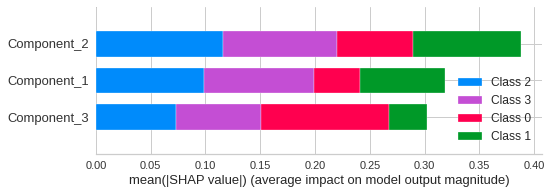

In [79]:
interpret_model(tuned_rf_pca, plot='summary')

In [87]:
interpret_model(tuned_rf_pca, plot='reason', observation=24)

In [83]:
interpret_model(tuned_rf_pca, plot='reason')